Завдання 1

Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad

<Axes: >

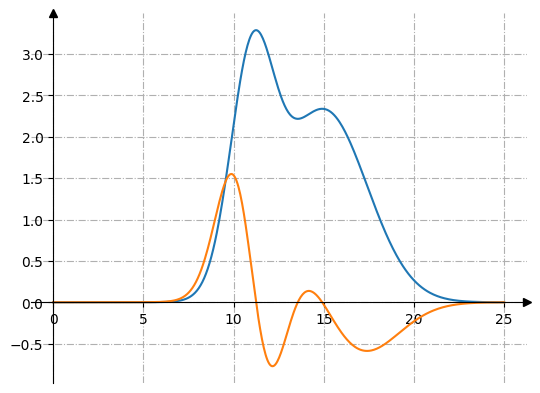

In [2]:
fig, ax = plt.subplots()
# Перемістимо лівий і нижній стовпчики до x = 0 і y = 0 відповідно.
ax.spines[["left", "bottom"]].set_position(("data", 0))

# Сховати верхню та праву лінію
ax.spines[["top", "right"]].set_visible(False)

# Намалюємо стрілки (як чорні трикутники: ">k"/"^k") на кінцях осей.
# Також вимкнемо відсікання (clip_on=False) стрілок.
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# Додамо проміжні лінії
ax.grid(True, linestyle='-.')

x = sp.Symbol('x')

f = 2 * ((4 / (1.2 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 11) / 1.2)**2) + (7 / (2.4 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 15) / 2.4)**2))

df = f.diff(x)

f_lambd = sp.lambdify(x, f, 'numpy')
df_lambd = sp.lambdify(x, df, 'numpy')

x1 = np.linspace(0, 25, 500)
y = f_lambd(x1)
dy = df_lambd(x1)

sns.lineplot(x=x1, y=y, ax=ax)
sns.lineplot(x=x1, y=dy, ax=ax)

In [3]:
# Невизначений інтеграл
sp.integrate(f, x)

4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)

In [4]:
# Інтеграл від a до b
sp.integrate(f, (x, 9, 18))

14.178654163478*sqrt(2)

Завдання 2

Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.

In [5]:
# Метод прямокутників
f = lambda x: 2 * ((4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2)**2) + (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4)**2))


a, b, n = 9, 18, 10

def integrate_rect(f, a, b, n):
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = f(x)
    res = h * np.sum(y[:-1])
    #res = h * np.sum(y[1:])
    return res

integrate_rect(f, a, b, n)


19.809658564168625

Завдання 3
Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.

In [6]:
def trapezoidal_integration(func, a, b, n):
    """
    Чисельне інтегрування методом трапецій.

    :param func: Функція, яку інтегруємо.
    :param a: Нижня межа інтегрування.
    :param b: Верхня межа інтегрування.
    :param n: Кількість трапецій (розбиття).
    :return: Значення інтегралу.
    """
    h = (b - a) / n
    result = 0.5 * (func(a) + func(b))

    for i in range(1, n):
        result += func(a + i * h)

    result *= h
    return result

# Приклад використання
def example_function(x):
    return 2 * ((4 / (1.2 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 11) / 1.2)**2) + (7 / (2.4 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 15) / 2.4)**2))

lower_limit = 9
upper_limit = 18
num_trapezoids = 10

integral_value = trapezoidal_integration(f, lower_limit, upper_limit, num_trapezoids)
print(f"Значення інтегралу: {integral_value}")

Значення інтегралу: 24.9969359438867*sqrt(2)/sqrt(pi)


Завдання 4
Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.

In [ ]:
def f(x):
    return 2 * ((4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2)**2) +
                (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4)**2))

In [ ]:
def integrate_simpson(f, a, b, n):
   h = (b - a) / n
   x = np.linspace(a, b, n+1)
   y = f(x)

   S = y[0] + y[-1] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2])
   return (h / 3) * S

   a, b = 9, 18
   n = 100

result = integrate_simpson(f, a, b, n)
result

20.05164509377643

Завдання 5
Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.

In [ ]:
result, error = quad(f, a, b)
result, error

(20.051645014188296, 1.2672390114804206e-11)